In [1]:
#Listing 3.12
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
#print(train_data[10])

word_index = reuters.get_word_index()
#print(word_index)
#{'mdbl': 10996, 'fawc': 16260,

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#print(reverse_word_index)
#{10996: 'mdbl', 16260: 'fawc',

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
#print(decoded_newswire)


8982
2246


In [2]:
#3.5.2
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_text = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [3]:
#3.15
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



2021-11-05 11:39:59.251864: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
#3.16
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

#3.5.4
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#3.18
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 2.6561 - accuracy: 0.5482 - val_loss: 1.7151 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4092 - accuracy: 0.7172 - val_loss: 1.3155 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0359 - accuracy: 0.7828 - val_loss: 1.1388 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8098 - accuracy: 0.8242 - val_loss: 1.0457 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6380 - accuracy: 0.8637 - val_loss: 0.9670 - val_accuracy: 0.8090
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5085 - accuracy: 0.8941 - val_loss: 0.9426 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4053 - accuracy: 0.9152 - val_loss: 0.9084 - val_accuracy: 0.8170
Epoch 8/20
16

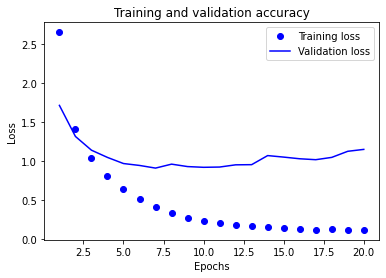

In [17]:
#3.19
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

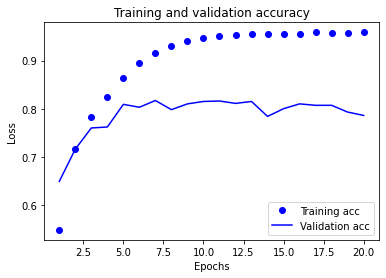

In [20]:
#3.20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()